<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/01_neural_network_regression_model_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Intro to regression with neural networks in tensorflow

There are many defination for a regression problem: simple defination, estimating the relationship between a dependent variable and an independent variable *(Predicting a number, based of some other numbers)* 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

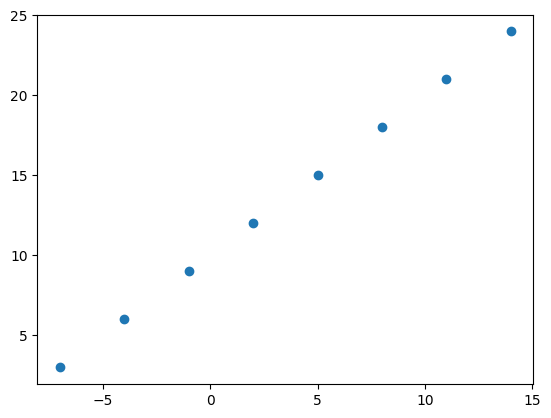

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features

X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visuaize it
plt.scatter(X,y);


In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# input shapes and output shape 

In [ ]:
#create a demo tensor for the housing price preditction problem

house_info = tf.constant(['bedrooms','bathrooms','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Turning the numpy array into tensors

X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

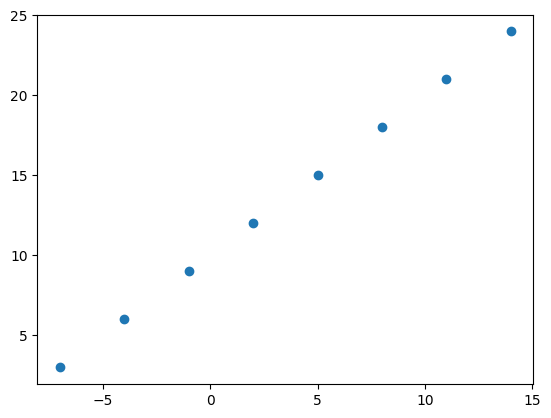

In [ ]:
plt.scatter(X,y)

## steps in modelling in TF

1. **Creating a model**
    define the input, output and hidden layer for a deep learing model
2. **Compiling hte model**
    define the loss function and the optimizer and evaluation metrix
3. **Fitting a model**
    Letting the models find the patters between X and y


In [ ]:
tf.random.set_seed(42)

#1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# complie the model
model.compile(
    loss=tf.keras.losses.mae,# mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #SDG-> stochastic gradient descent
    metrics = ["mae"]
               )

# Fit the model
model.fit(tf.expand_dims(X,axis = -1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 605ms/step - loss: 12.0629 - mae: 12.0629
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.9304 - mae: 11.9304
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.7979 - mae: 11.7979
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.6654 - mae: 11.6654
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 11.5329 - mae: 11.5329


In [ ]:
# check out x and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#  make a predicition

model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[10.004992]], dtype=float32)

### how to improve the model

impovement by altering the steps taken to create the model

1. **creating the model** : adding more layers increase the number of hidden units (neurons)
2. **compiling a model** : change the optimization function or the learining rate of the optimization function
3. **Fitting a model** : more epochs or more data to learn from



In [ ]:
# Create the model again


#1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# complie the model
model.compile(
    loss=tf.keras.losses.mae,# mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #SDG-> stochastic gradient descent
    metrics = ["mae"]
               )

# Fit the model (this time train for longer)
model.fit(tf.expand_dims(X,axis = -1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 509ms/step - loss: 16.7806 - mae: 16.7806
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.4993 - mae: 16.4993
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 16.2181 - mae: 16.2181
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 15.9368 - mae: 15.9368
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 15.6556 - mae: 15.6556
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 15.3743 - mae: 15.3743
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 15.0931 - mae: 15.0931
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 14.8483 - mae: 14.8483
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 14.7158 - mae: 14.7158
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 14.5833 - mae: 14.5833
Epoch 11/100
1/1 [==============================

In [ ]:
# Lets predict and see improvements
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[29.796041]], dtype=float32)

In [ ]:
# Create the model again
# Adding the more layers


#1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# complie the model
model.compile(
    loss=tf.keras.losses.mae,# mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #SDG-> stochastic gradient descent
    metrics = ["mae"]
               )

# Fit the model (this time train for longer)
model.fit(tf.expand_dims(X,axis = -1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 771ms/step - loss: 18.7384 - mae: 18.7384
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 17.7079 - mae: 17.7079
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 16.7389 - mae: 16.7389
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 15.8203 - mae: 15.8203
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 14.9416 - mae: 14.9416
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.3435 - mae: 14.3435
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9552 - mae: 13.9552
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5705 - mae: 13.5705
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1875 - mae: 13.1875
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8042 - mae: 12.8042
Epoch 11/100
1/1 [==============================

In [ ]:
# Lets predict and see improvements
model.predict([17.0])

1/1 [==============================] - 0s 80ms/step


array([[29.570799]], dtype=float32)

In [ ]:
# Create the model again
# changing the optimizer 

#1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)

])

# complie the model
model.compile(
    loss=tf.keras.losses.mae,# mae -> mean absolute error
    optimizer = tf.keras.optimizers.Adam(lr = 0.01), #SDG-> stochastic gradient descent
    metrics = ["mae"]
               )

# Fit the model (this time train for longer)
model.fit(tf.expand_dims(X,axis = -1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 609ms/step - loss: 13.3683 - mae: 13.3683
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.3032 - mae: 13.3032
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.2380 - mae: 13.2380
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1727 - mae: 13.1727
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1073 - mae: 13.1073
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0419 - mae: 13.0419
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9764 - mae: 12.9764
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9108 - mae: 12.9108
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8450 - mae: 12.8450
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7792 - mae: 12.7792
Epoch 11/100
1/1 [==============================]

In [ ]:
# Lets predict and see improvements
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[32.06253]], dtype=float32)

### Evaluating a models Performance

When evaluating models, visualise


In [ ]:
# make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

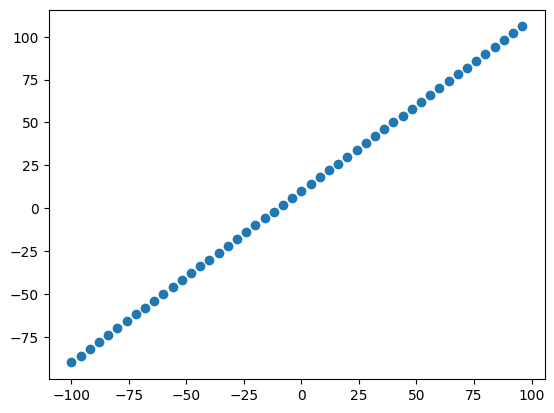

In [ ]:
# Visualise the data
import matplotlib.pyplot as plt

plt.scatter(X,y)


# The 3 sets...

training set(70-80%)

Validation set(10-15%)

Test set(10-15)

In [ ]:
# check lenght of the data we have
len(X)

50

In [ ]:
# Split the data in to train and test set

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]


len(y_test)

10

## Visualing the data

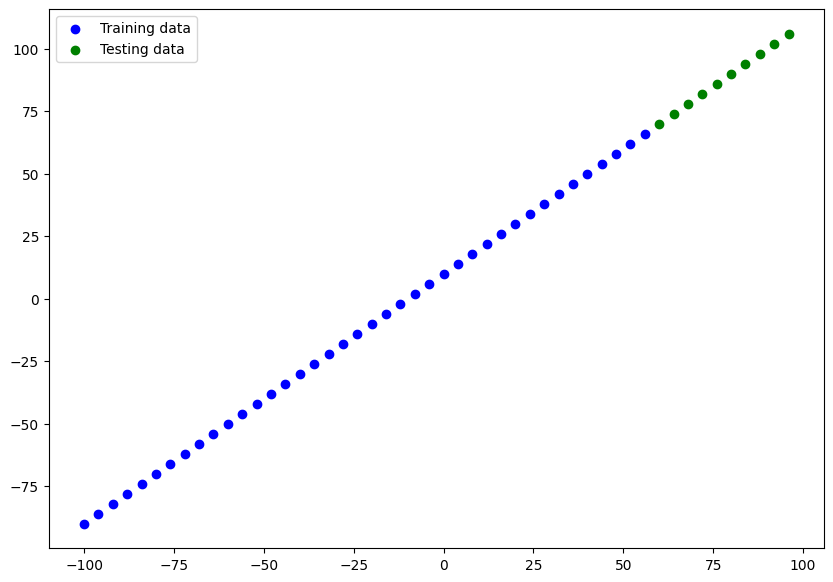

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label ="Testing data")
plt.legend()

In [ ]:
# Creating the model

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
# model.fit(X_train,y_train,epochs=100)

##Visulaize the model

In [ ]:
# model.summary()
# model.build()

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],activation = "relu"),
    tf.keras.layers.Dense(1,name = "output_layer")
],name="model_1")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [ ]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


total params - total numner of paramerters in the model

trainabe parameters - parameters (patterns) the model can update as it trains

non-trainable parameter - parameters that can be updated during training.

In [ ]:
model.fit(X_train,y_train,verbose=0,epochs=200)

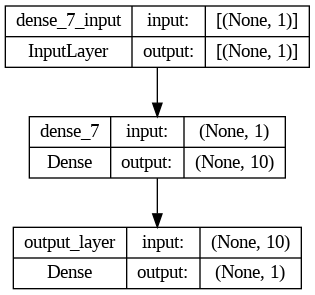

In [ ]:
from keras.utils.vis_utils import plot_model
# from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)


### visulaizing the models prediction

To viualize predictions. plot them against the ground truth labels

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 66ms/step


array([[ 65.17802 ],
       [ 69.43444 ],
       [ 73.690865],
       [ 77.94728 ],
       [ 82.2037  ],
       [ 86.46011 ],
       [ 90.71653 ],
       [ 94.97295 ],
       [ 99.22937 ],
       [103.485794]], dtype=float32)

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 65.17802 ,  69.43444 ,  73.690865,  77.94728 ,  82.2037  ,
        86.46011 ,  90.71653 ,  94.97295 ,  99.22937 , 103.485794],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# plotting funtion

def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labes = y_test,
                     predictions = y_pred):
  '''
  plots training data, test data and copares predictions to ground truth labels
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', label='Training_data')
  plt.scatter(test_data, test_labes, c = 'g', label='Testing data')
  plt.scatter(test_data,predictions,c='r',label="predictions")
  plt.legend();

 

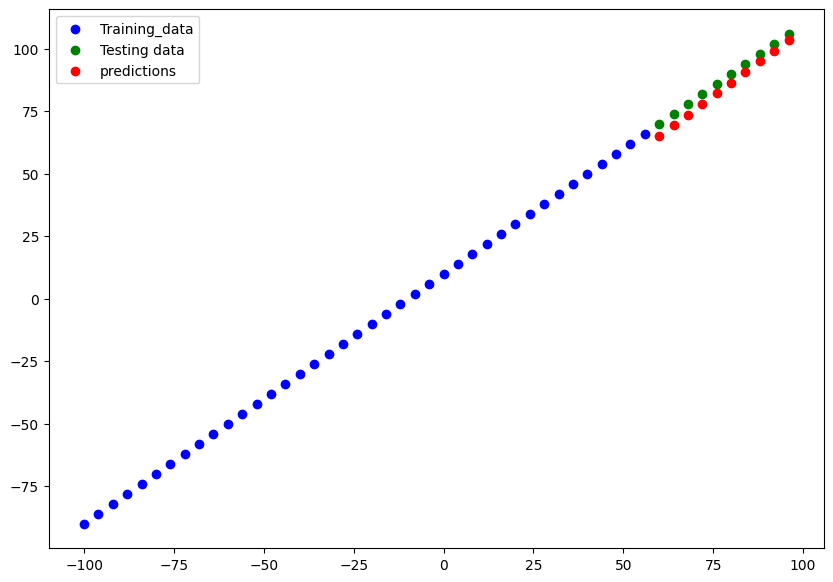

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labes=y_test,
                 predictions=y_pred)

### Evaluating the models predictions with regression metrics

Depending on the problem we are working on, there will be different evalution metrics to evaluate the models preformance. two of the main ones are:

> MAE => mean absolute error
> MSE => mean square error 

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 169ms/step - loss: 3.6681 - mae: 3.6681


[3.6680939197540283, 3.6680939197540283]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                y_pred = tf.squeeze(y_pred))

mae.numpy()

3.668094

# Mean Square error

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred = tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.997355>

In [ ]:
# Evaluation Finctions

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred = tf.squeeze(y_pred))

def mse(y_true,y_pred):
   return tf.metrics.mean_squared_error(y_true=y_test, y_pred = tf.squeeze(y_pred))


## Running Experiments to improve our model

**Build model_1**

Same as original model. 1 layer, trained for 100 epochs

In [ ]:
X_train.shape


TensorShape([40])

In [ ]:
# set random set

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# model_1.fit(X_train,y_train,epochs=100)
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose = 0)

1/1 [==============================] - 0s 76ms/step


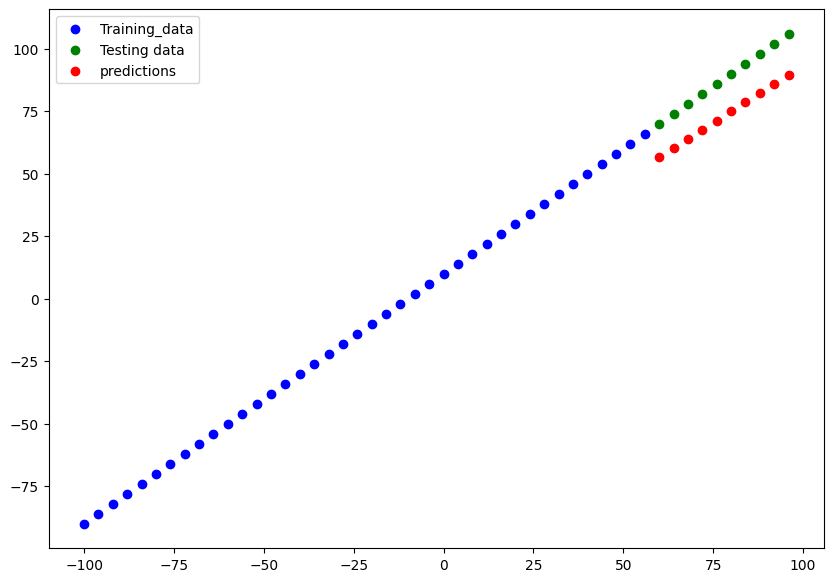

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [ ]:
# Calc model_1 evaluation metrix
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.901662>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.88828>)

 **Build model 2**

 Two dense layer for 100 epochs

In [ ]:
# set random set

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# model_1.fit(X_train,y_train,epochs=100)
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose = 0)

1/1 [==============================] - 0s 54ms/step


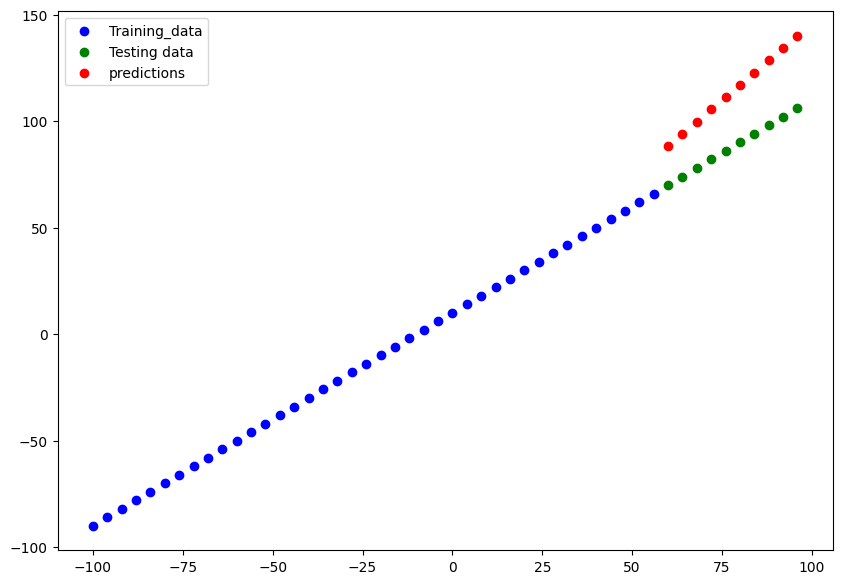

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [ ]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.15952>,
 <tf.Tensor: shape=(), dtype=float32, numpy=709.8978>)

**Build Mode 3**

model with 2 dense layers, 200 epochs

In [ ]:
# set random set

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# model_1.fit(X_train,y_train,epochs=100)
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200,verbose = 0)

1/1 [==============================] - 0s 59ms/step


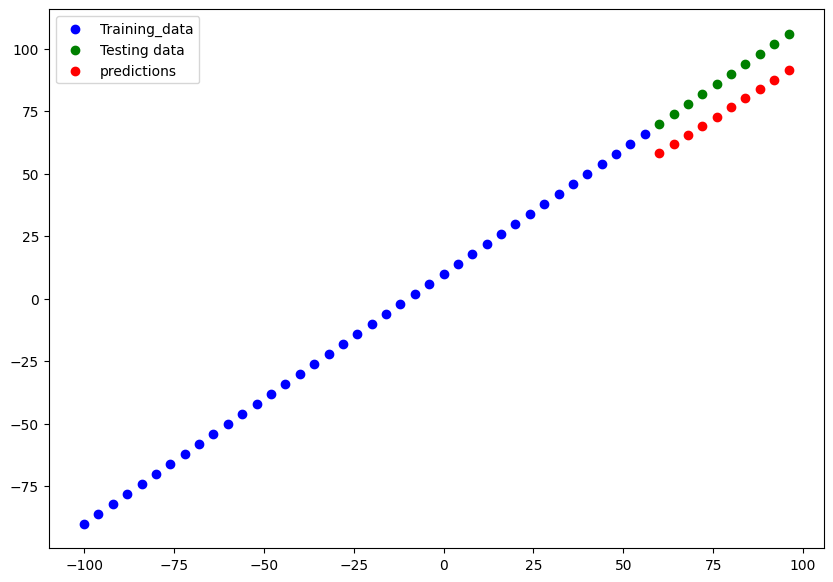

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [ ]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=13.266024>,
 <tf.Tensor: shape=(), dtype=float32, numpy=176.80486>)

**NOTE** start with a small experiment and increase the complexity when needed

# Comparing the results of the experiments

In [ ]:
# lets compare the results using pandas dataframe

import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,14.901662,222.888275
1,model_2,26.159519,709.897827
2,model_3,13.266024,176.804855


Looks like `model_2` perfromed the best

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note** main goal, minimize the time between experiments.

The more the expreiments the more you know what does not work,

the more you know what does not work the more you closer to what will work

# Tracking your experiments

Remember to track your experiments

tools used to have

**Resource:** As you build more models, look into using:

> TensorBoard -> Helps track modeling experiments


> Weights and Biases -> Tracking all king of ml experiments 


# Saving our models

Saving a model allows us to use the model outside the colad


Formata to save the model:
SaveModel

HDF5 format

In [ ]:
model_2.save("best_model")

In [ ]:
model_2.save('best_model.h5')

# Loading in saved model

In [ ]:
# load in the saveModel 
loaded_savedModel = tf.keras.models.load_model("best_model")

In [ ]:
loaded_savedModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
  # loading the H5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
medel_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

loaded_h5_model_preds

1/1 [==============================] - 0s 24ms/step


array([[ 88.23608 ],
       [ 93.99683 ],
       [ 99.75759 ],
       [105.518364],
       [111.279144],
       [117.0399  ],
       [122.80066 ],
       [128.56143 ],
       [134.3222  ],
       [140.08298 ]], dtype=float32)

In [ ]:
medel_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# dowload from google colad

1. Go to the file right click and click download

2. code it put

3. save to google dirve

In [ ]:
from google.colab import files

files.download("/content/best_model.h5")

# A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance  = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['smoker'], insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
#  one hot encode the dataframe 
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create the X and y values
y = insurance_one_hot['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X = insurance_one_hot
X.drop(['charges'],axis=1)
X.shape

(1338, 12)

In [ ]:
# splitting the to X test X train y test and y 

from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)

In [ ]:
# Buld a model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])


history_1 = insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: nan - mae: nan
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
40/40 [==========

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: nan - mae: nan


[nan, nan]

In [ ]:
y_pred = insurance_model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [ ]:
insurance_mae_1 = mae(y_test,y_pred)

## The model did not do well, lets improve it.

1. Change optimizer
2. Add extra layer with more hiden units (with adam)

### changing the optimizer

In [ ]:
# Buld a model

tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])


history_2 = insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 11724.1836 - mae: 11724.1836
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 8270.8154 - mae: 8270.8154
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 4366.2686 - mae: 4366.2686
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 634.5194 - mae: 634.5194
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 41.4920 - mae: 41.4920
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 23.0592 - mae: 23.0592
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 16.2068 - mae: 16.2068
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 17.3139 - mae: 17.3139
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 13.8061 - mae: 13.8061
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 17.9369 - mae: 17.9369
Epoch 11/100
40/40 [===

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 4.0298 - mae: 4.0298


[4.029836177825928, 4.029836177825928]

In [ ]:
y_pred_2 = insurance_model_2.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_test.to_numpy()

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ,
       18259.216  ,  7256.7231 ,  3947.4131 , 46151.1245 , 48673.5588 ,
       44202.6536 ,  9800.8882 , 42969.8527 ,  8233.0975 , 21774.32215,
        5080.096  ,  7441.501  ,  1256.299  ,  2755.02095, 11085.5868 ,
       10923.9332 , 12644.589  , 18804.7524 ,  9715.841  ,  1131.5066 ,
       15828.82173, 11842.62375,  2020.5523 ,  5693.4305 ,  2904.088  ,
        7448.40395,  2597.779  ,  7337.748  , 23887.6627 , 38709.176  ,
        4687.797  ,  2643.2685 , 11674.13   , 12124.9924 ,  4889.9995 ,
       12333.828  ,  3579.8287 ,  4391.652  , 42124.5153 ,  4463.2051 ,
       13887.204  ,  1719.4363 , 28476.73499,  1708.92575, 10594.2257 ,
       25333.33284,  3645.0894 , 38746.3551 , 11848.141  , 10564.8845 ,
       13880.949  ,  4753.6368 , 27941.28758,  8017.06115, 23045.56616,
        4133.64165, 17942.106  ])

In [ ]:
y_pred_2

array([[ 9092.437 ],
       [ 5270.8374],
       [29323.209 ],
       [ 9299.154 ],
       [33740.21  ],
       [ 4535.3457],
       [ 2116.7043],
       [14206.456 ],
       [ 3731.411 ],
       [10261.47  ],
       [18254.848 ],
       [ 7254.7236],
       [ 3946.2202],
       [46137.066 ],
       [48658.65  ],
       [44189.195 ],
       [ 9798.2295],
       [42956.86  ],
       [ 8230.575 ],
       [21768.969 ],
       [ 5078.5586],
       [ 7439.4697],
       [ 1256.009 ],
       [ 2754.6   ],
       [11082.43  ],
       [10920.874 ],
       [12641.02  ],
       [18798.477 ],
       [ 9713.048 ],
       [ 1131.0267],
       [15823.806 ],
       [11839.265 ],
       [ 2020.0193],
       [ 5691.729 ],
       [ 2903.3396],
       [ 7446.5234],
       [ 2597.0906],
       [ 7335.7617],
       [23881.656 ],
       [38697.414 ],
       [ 4686.5303],
       [ 2642.6274],
       [11670.909 ],
       [12121.3   ],
       [ 4888.6006],
       [12330.106 ],
       [ 3579.0374],
       [ 4390

In [ ]:
insurance_mae_2 = mae(y_test,y_pred_2)

### adding more hidden layers in the model

In [ ]:
# Buld a model

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])


history_3 = insurance_model_3.fit(X_train,y_train,epochs=100)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 23.2264 - mae: 23.2264


[23.22637939453125, 23.22637939453125]

In [ ]:
y_pred_3 = insurance_model_3.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
insurance_mae_3 = mae(y_test,y_pred_3)
insurance_mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=23.226507>

**Model 2 has the better outcome of the data**

Text(0.5, 0, 'epochs')

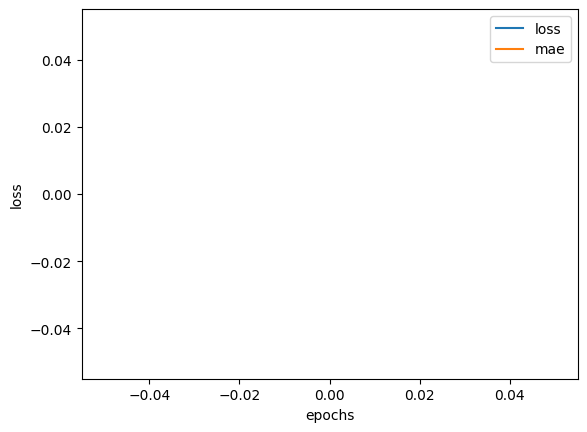

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


Text(0.5, 0, 'epochs')

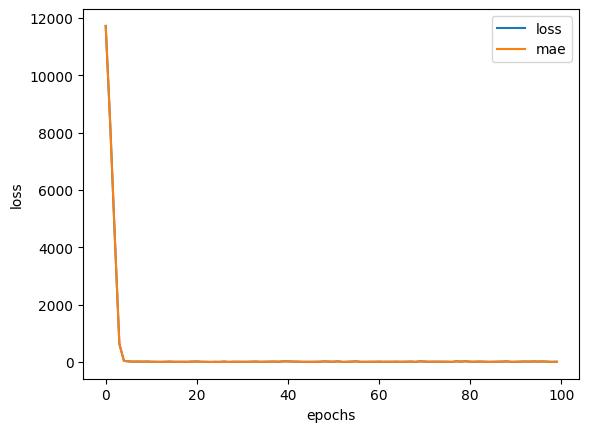

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

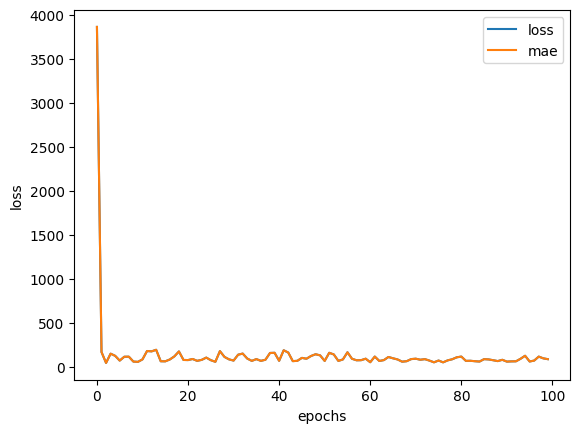

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing

Normalization and standization



### Normailization for neurl nets

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# read the insurance 
insurance  = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
